<a href="https://colab.research.google.com/github/anahitaoladan/Fundamental-Intelligent/blob/main/%D9%85%DB%8C%D9%86%DB%8C_%D9%BE%D8%B1%D9%88%DA%98%D9%87_%DB%8C_%D8%AF%D9%88%D9%85_%D9%85%D8%A8%D8%A7%D9%86%DB%8C_%D8%B3%DB%8C%D8%B3%D8%AA%D9%85_%D9%87%D8%A7%DB%8C_%D9%87%D9%88%D8%B4%D9%85%D9%86%D8%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

۱.۱.۱

In [ ]:
import numpy as np

N = 1000

def u(t):
    return np.sin(2 * np.pi * t / 250)

y = np.zeros(N)
y[0] = 0
y[1] = 1

for t in range(2, N):
    y[t] = y[t-1] / (1 + y[t-2]) + u(t-1)**3

X = np.zeros((N-2, 3))
T = np.zeros(N-2)

for t in range(2, N):
    X[t-2] = [y[t-1], y[t-2], u(t-1)]
    T[t-2] = y[t]

for i in range(len(X)):
    print(f"Sample {i}:")
    print("   X =", X[i])
    print("   T =", T[i])
    print("-" * 40)

Sample 0:
   X = [1.        0.        0.0251301]
   T = 1.00001587020052
----------------------------------------
Sample 1:
   X = [1.00001587 1.         0.05024432]
   T = 0.5001347764548979
----------------------------------------
Sample 2:
   X = [0.50013478 1.00001587 0.07532681]
   T = 0.25049281784200145
----------------------------------------
Sample 3:
   X = [0.25049282 0.50013478 0.10036171]
   T = 0.16799109930512146
----------------------------------------
Sample 4:
   X = [0.1679911  0.25049282 0.12533323]
   T = 0.13630870236041062
----------------------------------------
Sample 5:
   X = [0.1363087  0.1679911  0.15022559]
   T = 0.12009379564278323
----------------------------------------
Sample 6:
   X = [0.1200938  0.1363087  0.17502306]
   T = 0.111049143132354
----------------------------------------
Sample 7:
   X = [0.11104914 0.1200938  0.19970998]
   T = 0.10710796594108686
----------------------------------------
Sample 8:
   X = [0.10710797 0.11104914 0.2242707

۲.۱.۱

In [ ]:
X_train = X[:700]
T_train = T[:700]

X_test = X[700:]
T_test = T[700:]

print("Train:", X_train.shape, T_train.shape)
print("Test :", X_test.shape, T_test.shape)

Train: (700, 3) (700,)
Test : (298, 3) (298,)


۲.۲.۱

In [ ]:
import numpy as np

def rbf(x, mu, sigma):
    distance = np.linalg.norm(x - mu) ** 2
    return np.exp( - distance / (2 * sigma ** 2) )

x = np.array([1, 1])
mu = np.array([1, 1])
sigma = 1

output = rbf(x, mu, sigma)
print("RBF Output:", output)

RBF Output: 1.0


۱.۳.۱

In [ ]:
import numpy as np

def rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * sigma ** 2))

N = 1000
def u(t): return np.sin(2 * np.pi * t / 250)

y = np.zeros(N)
y[0], y[1] = 0, 1
for t in range(2, N):
    y[t] = y[t-1] / (1 + y[t-2]) + u(t-1)**3

X = np.zeros((N-2, 3))
T = np.zeros(N-2)
for t in range(2, N):
    X[t-2] = [y[t-1], y[t-2], u(t-1)]
    T[t-2] = y[t]

X_train, T_train = X[:700], T[:700]
X_test, T_test = X[700:], T[700:]

K = 10
np.random.seed(0)
centers = X_train[np.random.choice(len(X_train), K, replace=False)]
sigma = 1.0

Phi_train = np.array([[rbf(x, c, sigma) for c in centers] for x in X_train])
alpha = np.linalg.pinv(Phi_train.T @ Phi_train) @ Phi_train.T @ T_train

Phi_test = np.array([[rbf(x, c, sigma) for c in centers] for x in X_test])
Y_train_pred = Phi_train @ alpha
Y_test_pred = Phi_test @ alpha

rmse_train = np.sqrt(np.mean((Y_train_pred - T_train)**2))
rmse_test = np.sqrt(np.mean((Y_test_pred - T_test)**2))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 13.679273312828924
Test RMSE: 20.343851030731877


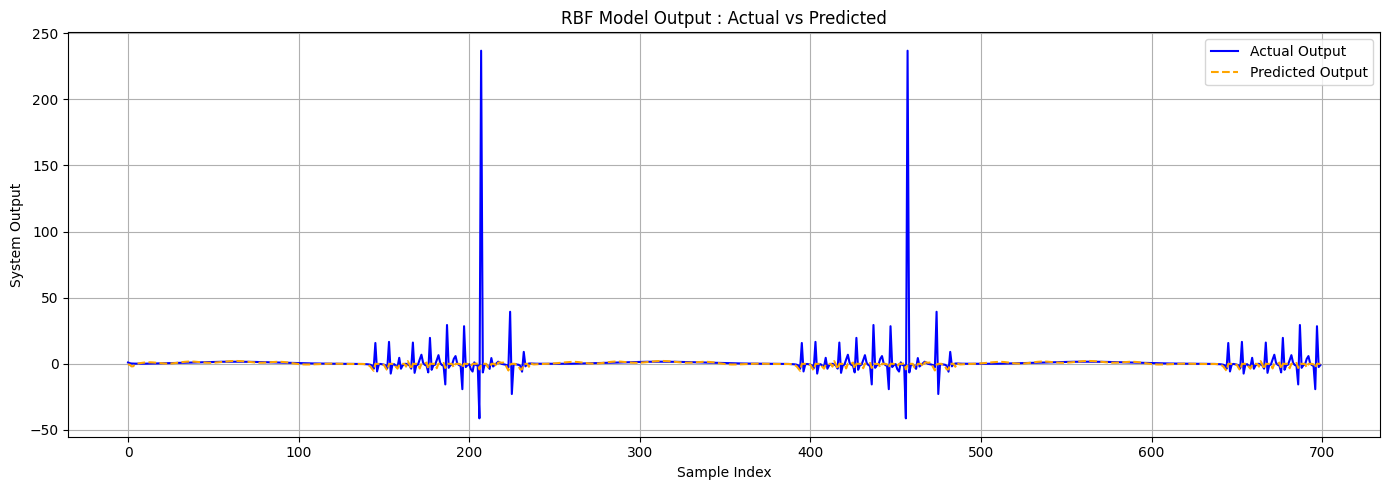

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(T_train, label='Actual Output', color='blue')
plt.plot(Y_train_pred, label='Predicted Output', color='orange', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("System Output")
plt.title("RBF Model Output : Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

۳.۳.۱

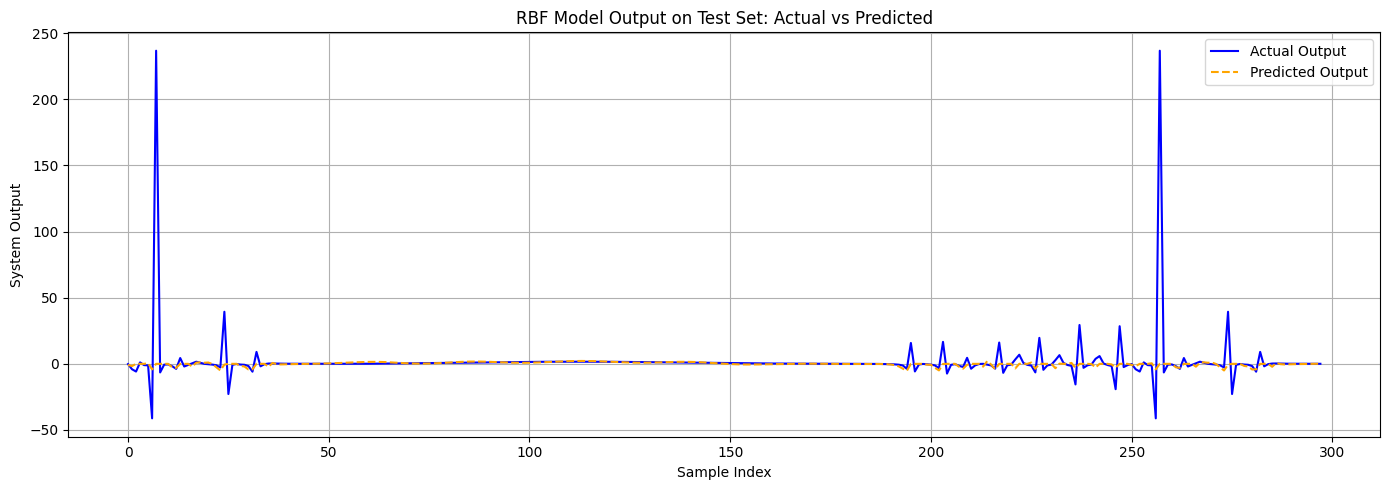

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(T_test, label='Actual Output', color='blue')
plt.plot(Y_test_pred, label='Predicted Output', color='orange', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("System Output")
plt.title("RBF Model Output on Test Set: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

5.3.1

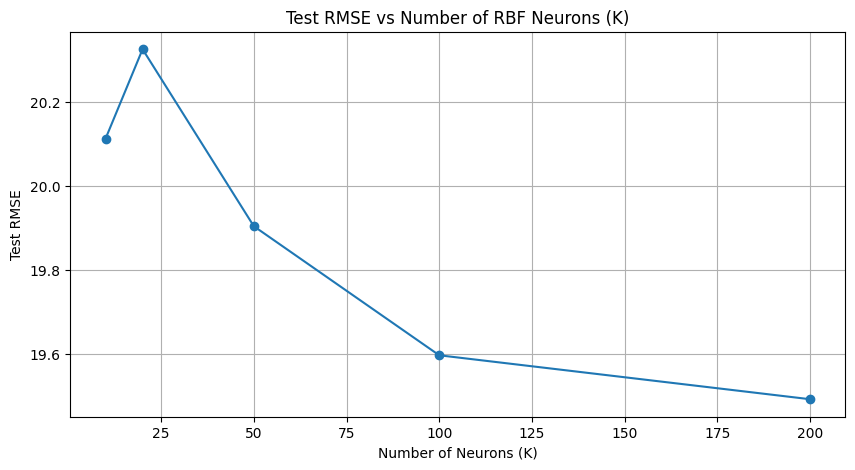

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def rbf(x, center, sigma):
    return np.exp(-np.linalg.norm(x - center)**2 / (2 * sigma**2))

def compute_phi(X, centers, sigma):
    N = X.shape[0]
    K = centers.shape[0]
    phi = np.zeros((N, K))
    for i in range(N):
        for j in range(K):
            phi[i, j] = rbf(X[i], centers[j], sigma)
    return phi

K_list = [10, 20, 50, 100, 200]
rmse_list = []

sigma = 1.0

for K in K_list:
    indices = np.random.choice(X_train.shape[0], K, replace=False)
    centers = X_train[indices]

    phi_train = compute_phi(X_train, centers, sigma)
    phi_test = compute_phi(X_test, centers, sigma)

    w = np.linalg.pinv(phi_train) @ T_train

    Y_test_pred = phi_test @ w

    rmse = np.sqrt(mean_squared_error(T_test, Y_test_pred))
    rmse_list.append(rmse)

plt.figure(figsize=(10, 5))
plt.plot(K_list, rmse_list, marker='o')
plt.title("Test RMSE vs Number of RBF Neurons (K)")
plt.xlabel("Number of Neurons (K)")
plt.ylabel("Test RMSE")
plt.grid(True)
plt.show()

۷.۳.۱

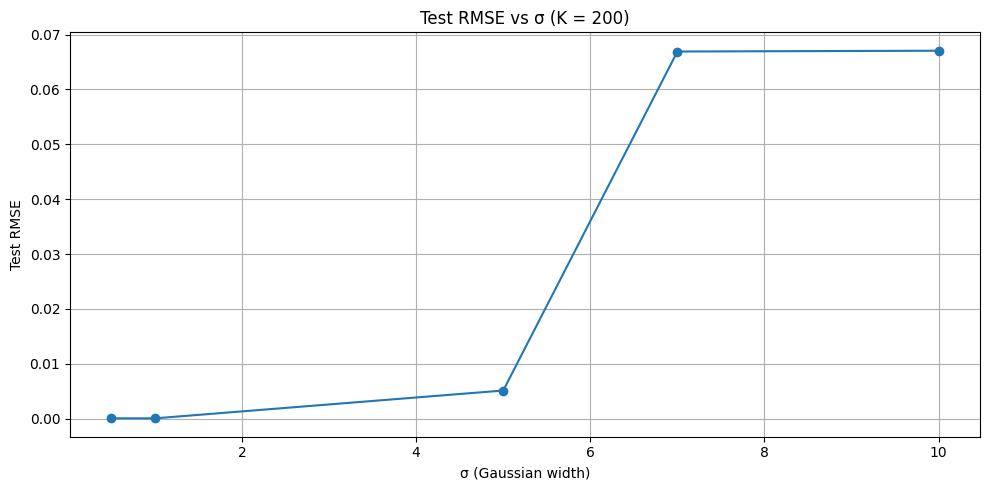

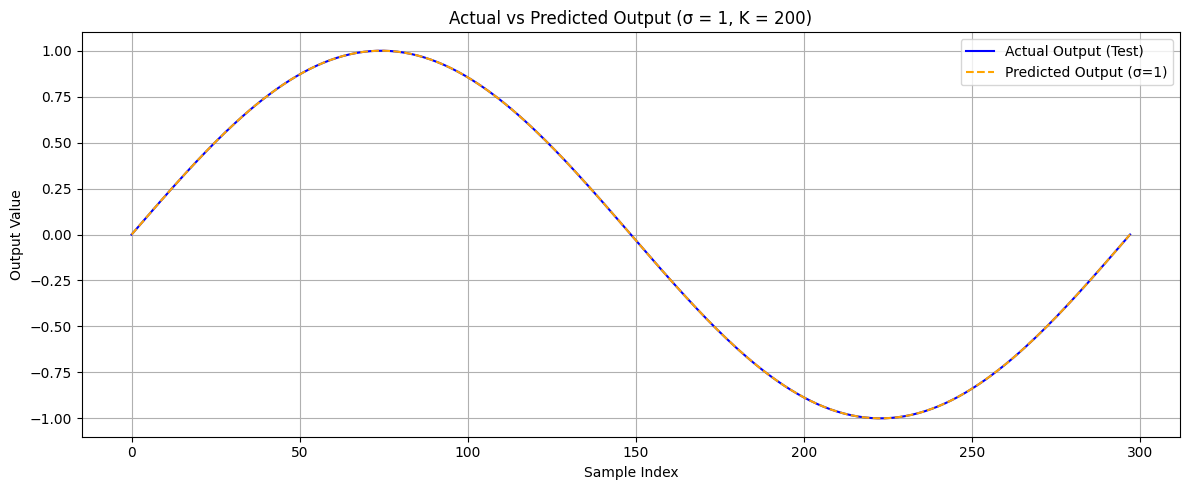

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def gaussian_rbf(x, c, s):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * s**2))

def compute_phi(X, centers, sigma):
    return np.array([[gaussian_rbf(x, c, sigma) for c in centers] for x in X])

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

X_train = np.linspace(0, 1, 700).reshape(-1, 1)
X_test = np.linspace(0, 1, 298).reshape(-1, 1)
T_train = np.sin(2 * np.pi * X_train).flatten()
T_test = np.sin(2 * np.pi * X_test).flatten()

sigmas = [0.5, 1, 5, 7, 10]
K = 200
np.random.seed(42)
random_indices = np.random.choice(len(X_train), size=K, replace=False)
centers = X_train[random_indices]

rmse_test_values = []
predictions_dict = {}

for sigma in sigmas:
    Phi_train = compute_phi(X_train, centers, sigma)
    Phi_test = compute_phi(X_test, centers, sigma)
    alpha = np.linalg.pinv(Phi_train) @ T_train
    Y_test_pred = Phi_test @ alpha
    rmse_test_values.append(rmse(T_test, Y_test_pred))
    predictions_dict[sigma] = Y_test_pred

plt.figure(figsize=(10, 5))
plt.plot(sigmas, rmse_test_values, marker='o')
plt.title("Test RMSE vs σ (K = 200)")
plt.xlabel("σ (Gaussian width)")
plt.ylabel("Test RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()

best_sigma = sigmas[np.argmin(rmse_test_values)]
best_prediction = predictions_dict[best_sigma]

plt.figure(figsize=(12, 5))
plt.plot(T_test, label='Actual Output (Test)', color='blue')
plt.plot(best_prediction, label=f'Predicted Output (σ={best_sigma})', color='orange', linestyle='--')
plt.title(f'Actual vs Predicted Output (σ = {best_sigma}, K = {K})')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()